In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn import tree
from sklearn.svm import SVC

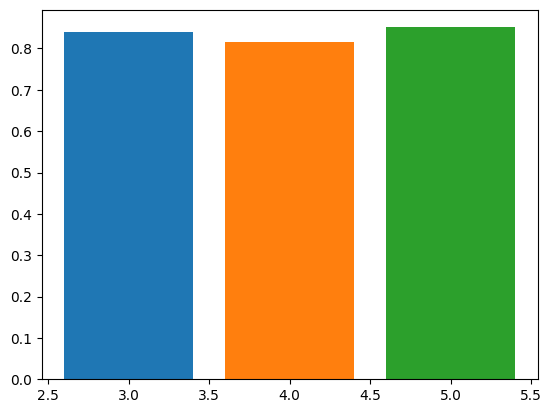

In [2]:
csvFile = pd.read_csv('../Datasets/Dataset3.csv')
colNames = list(csvFile.columns)

# print(colNames)

colNamesX = colNames.copy()
colNamesX.remove('Y')
dfX = csvFile[colNamesX]
X = dfX.values
Y = csvFile['Y'].values
# Randomize the data because it could be sorted.
numsMe = np.random.permutation(csvFile.shape[0])

# print(numsMe)
# folding for 3,4,5
for curr in range(3,6):
    num_folds = curr
    score = 0
    # implement cross validation
    # https://de.mathworks.com/discovery/cross-validation.html
    for i in range(0, num_folds):
        partition_size = int(np.floor(csvFile.shape[0] / num_folds))
        left_border = partition_size * i
        right_border = partition_size * (i + 1)
        testInds = numsMe[left_border:right_border]
        trainInds = np.concatenate((numsMe[0:left_border], numsMe[right_border:csvFile.shape[0]]))

        TrainX, TestX = X[trainInds], X[testInds]
        TrainY, TestY = Y[trainInds], Y[testInds]

        clf_dt = tree.DecisionTreeClassifier()
        clf_dt = clf_dt.fit(TrainX, TrainY)

        predY_dt = clf_dt.predict(TestX)

        score = score + accuracy_score(TestY, predY_dt)
    plt.bar(num_folds, score/num_folds)
plt.show()